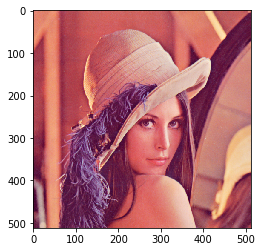

In [1]:
%matplotlib inline
import cv2

import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D


def surf(data):
    y = np.arange(0, data.shape[0])
    x = np.arange(0, data.shape[1])
    X, Y = np.meshgrid(x, y)

    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ax.plot_surface(X, Y, data, rstride=1, cstride=1, linewidth=0,
                    cmap='jet', antialiased=False)

    plt.show(block=False)


def LoG(size, sigma):
    x = y = np.linspace(-size, size, 2*size+1)
    x, y = np.meshgrid(x, y)

    f = (x**2 + y**2)/(2*sigma**2)
    k = -1./(np.pi * sigma**4) * (1 - f) * np.exp(-f)

    return k


# Edge demo

# Read Lena image
lenaL = cv2.imread('images/lena.png')
plt.imshow(cv2.cvtColor(lenaL, cv2.COLOR_BGR2RGB))
plt.show()

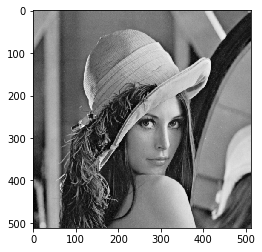

In [3]:
# Convert to monochrome (grayscale) using BGR2GRAY.
# TODO: change this line with the call to cv2.cvtColor
lenaMono = cv2.cvtColor(lenaL, cv2.COLOR_BGR2GRAY) 
plt.imshow(lenaMono, cmap='gray')

[[0.00301223 0.00399056 0.00496633 0.00580623 0.00637689 0.00657932
  0.00637689 0.00580623 0.00496633 0.00399056 0.00301223]
 [0.00399056 0.00528663 0.00657932 0.007692   0.00844801 0.00871618
  0.00844801 0.007692   0.00657932 0.00528663 0.00399056]
 [0.00496633 0.00657932 0.00818809 0.00957285 0.01051372 0.01084746
  0.01051372 0.00957285 0.00818809 0.00657932 0.00496633]
 [0.00580623 0.007692   0.00957285 0.0111918  0.01229178 0.01268197
  0.01229178 0.0111918  0.00957285 0.007692   0.00580623]
 [0.00637689 0.00844801 0.01051372 0.01229178 0.01349988 0.01392842
  0.01349988 0.01229178 0.01051372 0.00844801 0.00637689]
 [0.00657932 0.00871618 0.01084746 0.01268197 0.01392842 0.01437055
  0.01392842 0.01268197 0.01084746 0.00871618 0.00657932]
 [0.00637689 0.00844801 0.01051372 0.01229178 0.01349988 0.01392842
  0.01349988 0.01229178 0.01051372 0.00844801 0.00637689]
 [0.00580623 0.007692   0.00957285 0.0111918  0.01229178 0.01268197
  0.01229178 0.0111918  0.00957285 0.007692   0.00

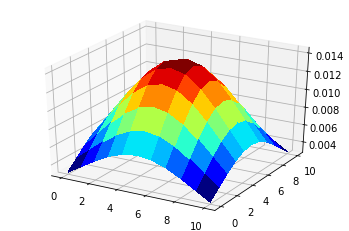

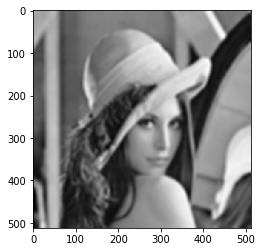

In [9]:
# Make a blurred/smoothed version. Use cv2.getGaussianKernel to get the h kernel
h = cv2.getGaussianKernel(ksize=11, sigma=4)  # TODO: change this line with the call to cv2.getGaussianKernel
h = h * h.T
print(h)

# Mimic Matlab's surf(h)
surf(h)

# Use cv2.filter2D with BORDER_CONSTANT to get results similar to the Matlab demo
lenaSmooth = cv2.filter2D(lenaMono, -1, h)  # TODO: use cv2.filter2D
plt.imshow(lenaSmooth, cmap='gray')
plt.show()

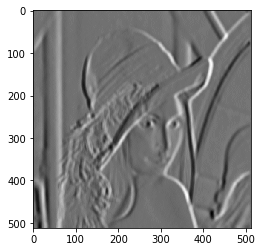

In [24]:
# Method 1: Shift left and right, and show diff image
lenaL = np.copy(lenaSmooth)  # Let's use np.copy to avoid modifying the original array
# TODO: use numpy indexing to copy and paste the array to the right position
lenaL[:,0:-2] = lenaL[:,1:-1]


lenaR = np.copy(lenaSmooth)  # Let's use np.copy to avoid modifying the original array
# TODO: use numpy indexing to copy and paste the array to the right position
lenaR[:,1:-1] = lenaR[:,0:-2]

# TODO: Subtract lenaL from lenaR. Don't forget about using the correct data type
lenaDiff = lenaR.astype(float) - lenaL.astype(float)  # Change this line with the answer

# Here we shift the value range to fit [0, 255] and make sure the data type is uint8 in order to display the results.
dst = np.zeros(lenaSmooth.shape)
lenaDiff = cv2.normalize(lenaDiff, dst=dst, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

plt.show()
plt.imshow(lenaDiff, cmap='gray')

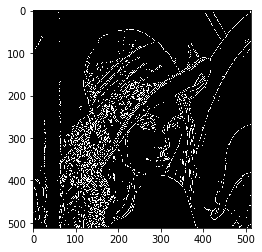

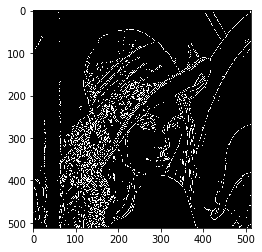

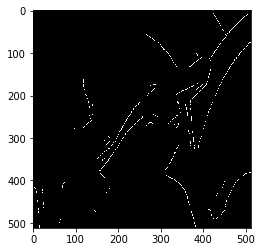

In [29]:
# Method 2: Canny edge detector
# OpenCV doesn't have a function similar to edge but it does have a Canny Edge detector
# OpenCV needs you to specify low and high threshold values. While these are not the
# exactly the same as the ones used in the demo you should refer to the lines below
# as a reference on how cv2.Canny works
thresh1 = 110
thresh2 = 100

cannyEdges = cv2.Canny(lenaMono, thresh2, thresh1)  # TODO: use cv2.Canny with lenaMono and the thresholds defined above
plt.imshow(cannyEdges, cmap='gray')
plt.show()

cannyEdges = cv2.Canny(lenaMono, thresh1, thresh2)  # TODO: use cv2.Canny with lenaMono and the thresholds defined above
plt.imshow(cannyEdges, cmap='gray')
plt.show()

cannyEdges = cv2.Canny(lenaSmooth, thresh2, thresh1)  # TODO: use cv2.Canny with lenaSmooth and the thresholds defined above
plt.imshow(cannyEdges, cmap='gray')
plt.show()

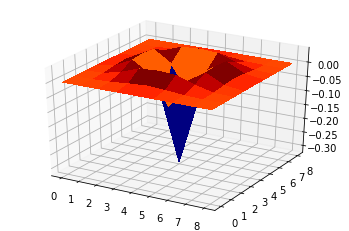

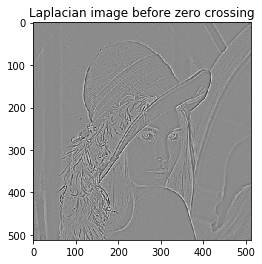

In [35]:
# Method 3: Laplacian of Gaussian
h = LoG(4, 1.)
surf(h)

# Let's use cv2.filter2D with the new h
logEdges = cv2.filter2D(1.0*lenaMono, -1, h)  # TODO: use cv2.filter2D
dst = np.zeros(lenaSmooth.shape)
logEdgesShow = cv2.normalize(logEdges, dst=dst, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

plt.imshow(logEdgesShow.astype(np.uint8), cmap='gray')
plt.title('Laplacian image before zero crossing', )
plt.show()

# OpenCV doesn't have a function edge like Matlab that implements a 'log' method. This would
# have to be implemented from scratch. This may take a little more time to implement this :).